In [1]:
import sys
sys.path.append('./helpers')
import loadmat as lm
import glob
import os
from collections import Counter
import numpy as np
import seaborn as sn
import pandas as pd

In [2]:
1

1

In [3]:
files = glob.glob('F:/NP_DATA/AA*.mat')

In [4]:
fn = os.path.basename(files[1])
animal=fn.split('_')[0]
date = fn.split('_')[1]

pp=dict();
validNames = [];
for cntr in range(len(files)):
    current_file = files[cntr]
    fn = os.path.basename(current_file)
    animal=fn.split('_')[0]
    date = fn.split('_')[1]
    if animal in pp:
        datelist = pp[animal]
        
        if date in datelist:
            None
        else:
            pp[animal].append(date)
            validNames.append(current_file)
    else:
        pp[animal]=[];
        pp[animal].append(date)
        validNames.append(current_file)

In [23]:
region_numbers = Counter()
raw_numbers = []
distance = [];
parent_winner = [];
count_regions = ['VIS','RS']
elements_per_region = dict()
for el in count_regions:
    elements_per_region[el]=list()

for iF in validNames:
    try:
        dataset = lm.loadmat(iF)
        #print(iF)
        if 'anatomy' in dataset:
            anatomy = dataset['anatomy']
        else:
            continue

        if 'parent_shifted' in anatomy:
            parent = anatomy['parent_shifted']
        else:
            parent = anatomy['cluster_parent']
        
        idx = dataset['sp']['cgs']==2
        dd=anatomy['tip_distance'][idx]
        
        
        raw_numbers.append((np.sum(idx),np.ptp(dd)))
        parent = parent[idx]
        parent = [pa if len(pa) else 'Null' for pa in parent]
        
        region_numbers.update(parent)
        parent_winner.append(Counter(parent).most_common(1)[0][0])
        for reg in count_regions:
            tmp = sum([1 if el.startswith(reg) else 0 for el in parent])
            if tmp>0:
                elements_per_region[reg].append(tmp)
            
    except:
        print(iF)
        
    

F:/NP_DATA\AA1_190728_gaincontrast10_1.mat


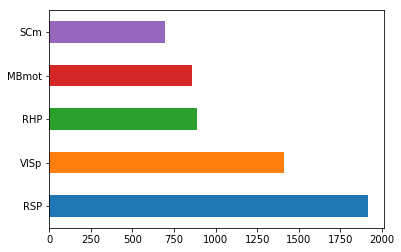

In [11]:
gg=region_numbers.elements()
gg=['RSP' if el.startswith('RS') else el for el in gg]
ff=pd.Series(gg)
ax=ff.value_counts()[:5].plot('barh')
fig = ax.get_figure()
fig.savefig(r'C:\temp\region_hist.pdf')

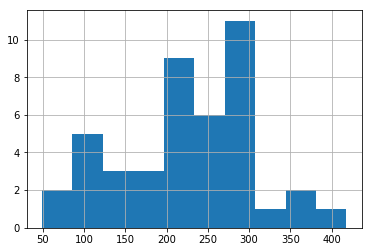

In [12]:
n_units = [x[0] for x in raw_numbers]
ff=pd.Series(n_units)
ff.hist()

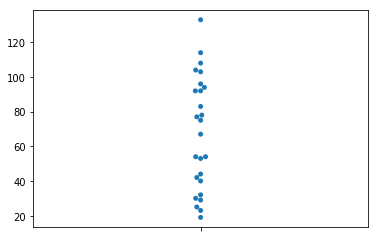

In [32]:
sn.swarmplot(y=elements_per_region['VIS'])

In [41]:
df = pd.DataFrame(columns=['Region', 'N_Units'])

In [46]:
df = pd.DataFrame(columns=['Region', 'N_Units'])
li = elements_per_region['VIS']
for el in li:
    df = df.append({'Region': 'VIS', 'N_Units': el}, ignore_index=True)

li = elements_per_region['RS']
for el in li:
    df = df.append({'Region': 'RS', 'N_Units': el}, ignore_index=True)

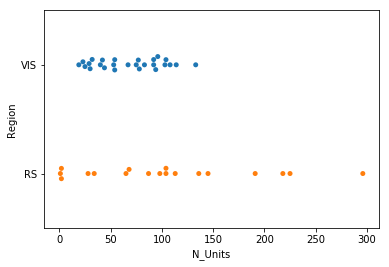

In [50]:

ax = sn.swarmplot(y="Region", x="N_Units", data=df)

fig = ax.get_figure()
fig.savefig(r'C:\temp\units_VISRSC.pdf')

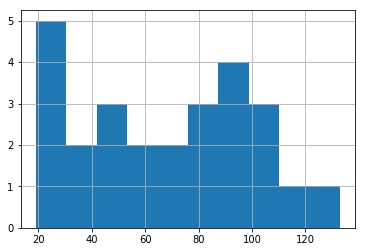

In [60]:
#sn.distplot(elements_per_region['VIS'])
ax=pd.Series(elements_per_region['VIS']).hist()
fig = ax.get_figure()
fig.savefig(r'C:\temp\units_VIS.pdf')

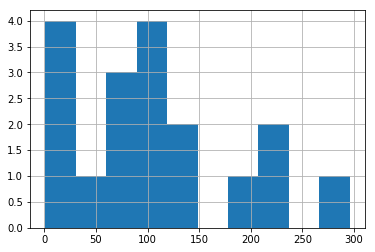

In [61]:
ax=pd.Series(elements_per_region['RS']).hist()
fig = ax.get_figure()
fig.savefig(r'C:\temp\units_RSC.pdf')